In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = 'GOOG'
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-24,3.012209,3.090914,2.982820,2.984563,2.977252,183336625
2004-09-27,2.977838,3.010715,2.934003,2.945460,2.938244,141994242
2004-09-28,3.021176,3.173106,2.994028,3.159657,3.151917,340190355
2004-09-29,3.155672,3.362895,3.143966,3.264763,3.256765,613229953
2004-09-30,3.235373,3.295149,3.212957,3.227901,3.219993,276468402


In [5]:
google_data.shape

(5033, 6)

In [6]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,46.351413,46.839790,45.887536,46.371091,46.260771,1.145230e+08
std,44.361956,44.850562,43.925352,44.390485,44.290919,1.492183e+08
min,2.977838,3.010715,2.934003,2.945460,2.938244,1.584340e+05
25%,13.136262,13.250085,12.988815,13.126798,13.094640,2.706000e+07
50%,27.365368,27.564322,27.082146,27.327499,27.260553,5.356001e+07
75%,61.270500,61.750000,60.615002,61.198502,61.048576,1.401273e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-09-24 to 2024-09-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [8]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing price of Google Data')

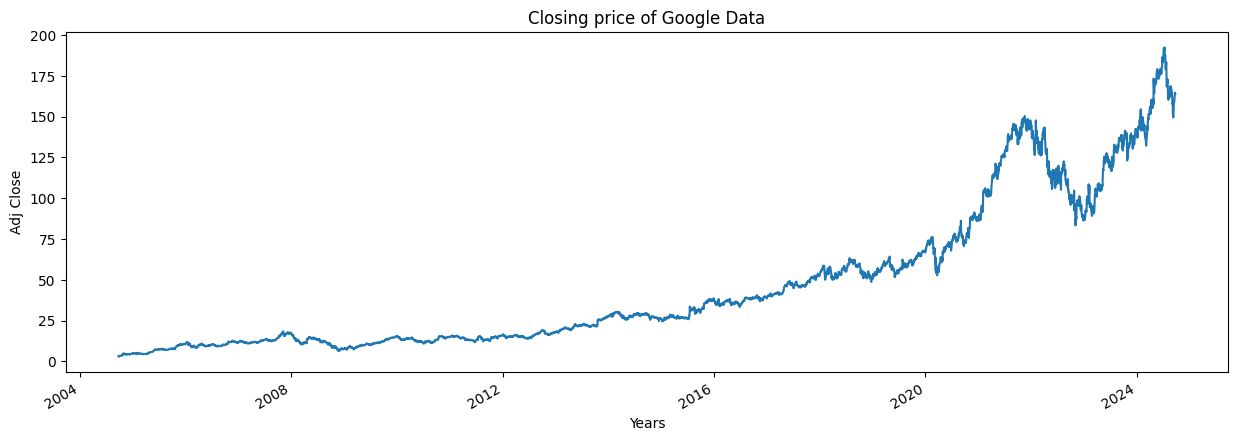

In [9]:
plt.figure(figsize= (15,5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google Data")



In [10]:
def plot_graph(figsize, values ,column):
    plt.figure()
    values.plot(figsize= figsize)
    plt.xlabel("Years")
    plt.ylabel(column)
    plt.title(f"{column} of google data")


In [11]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

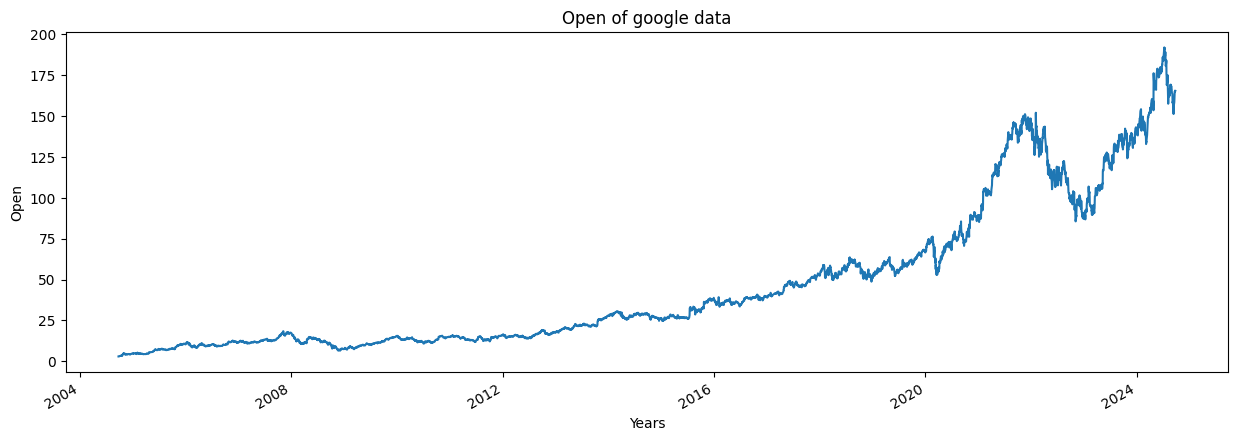

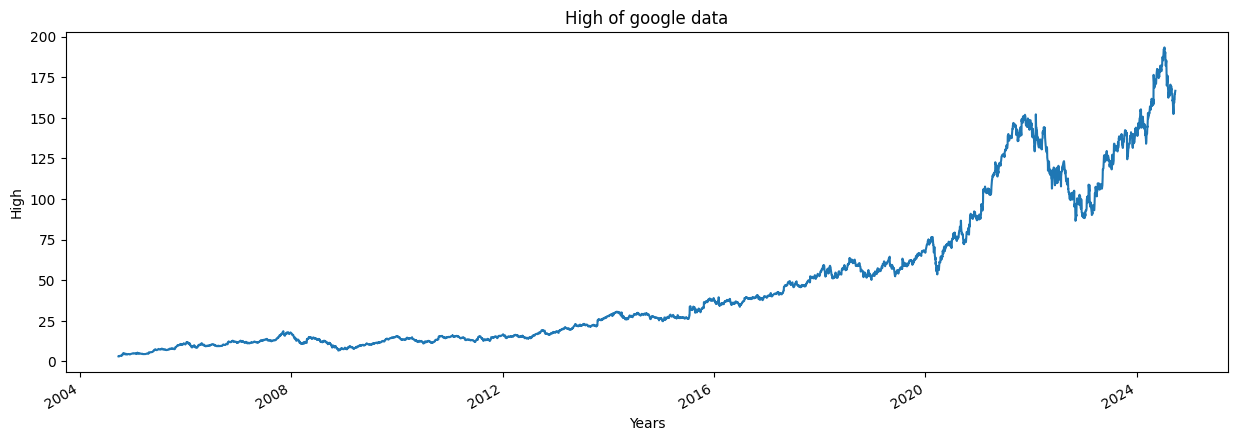

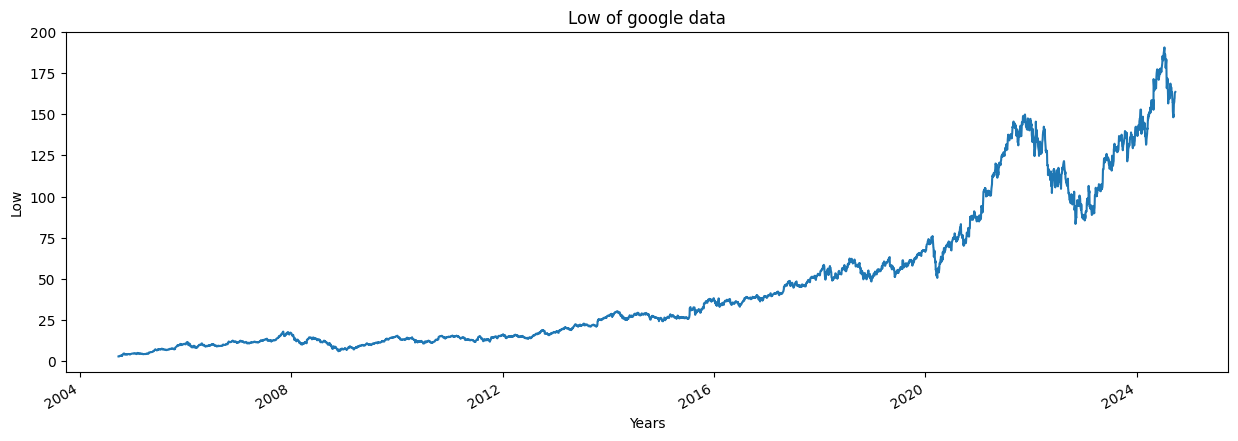

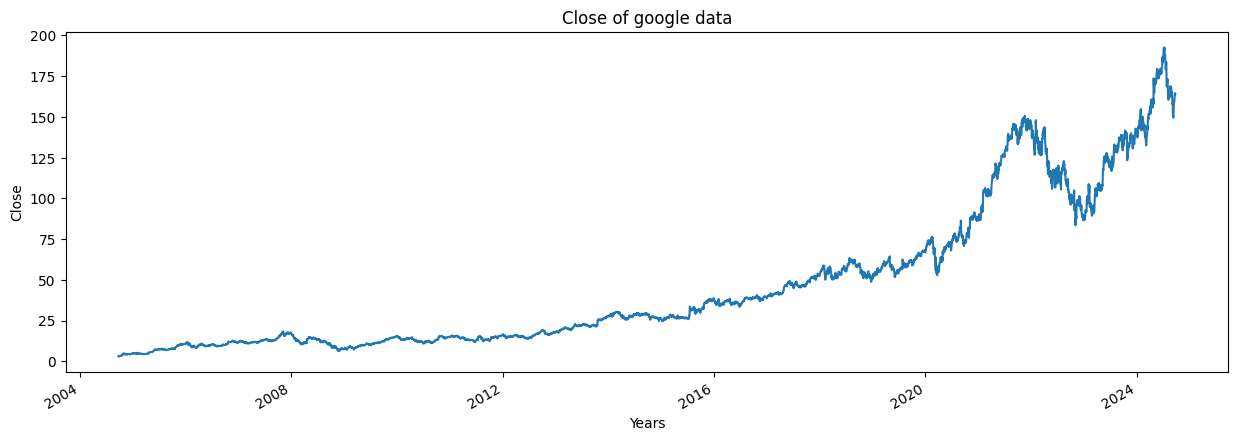

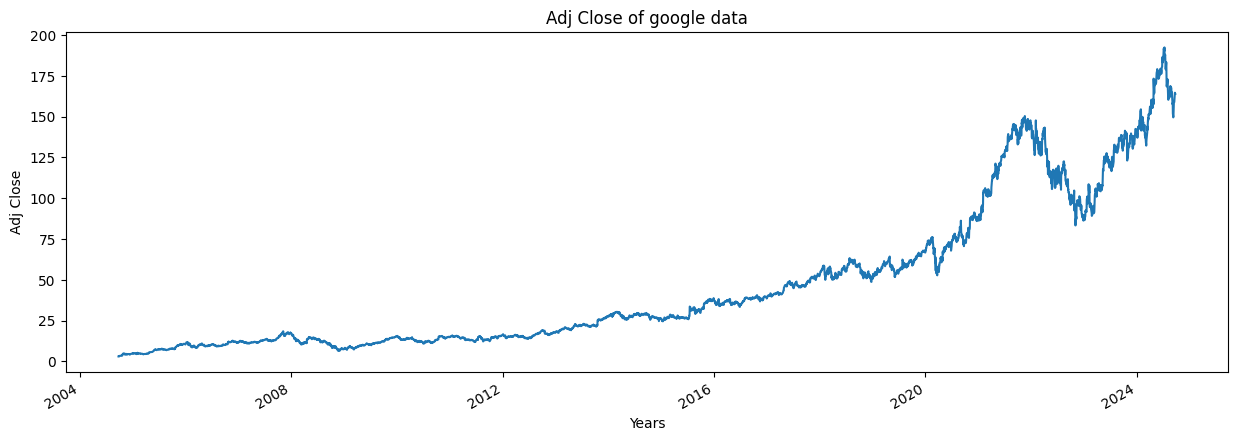

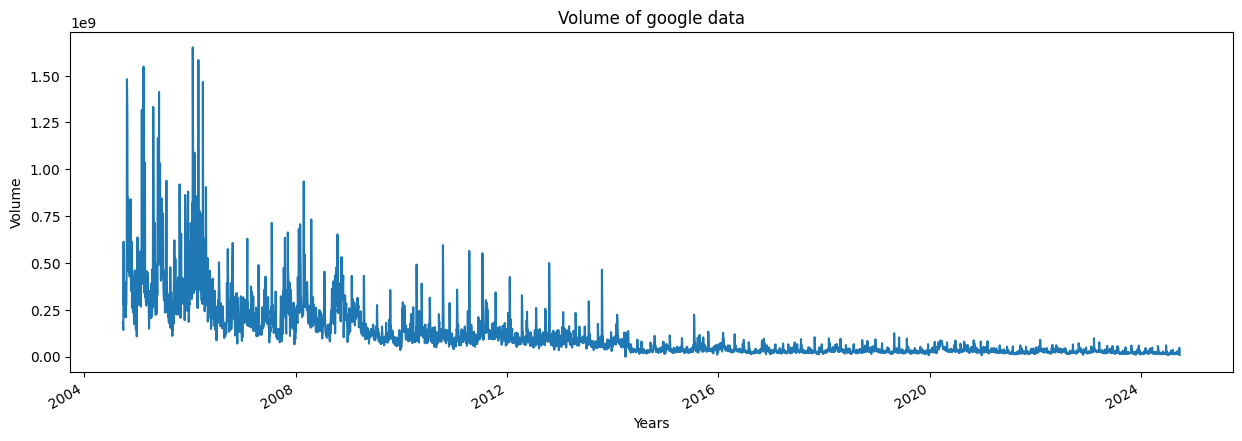

In [12]:
for column in google_data.columns :
    plot_graph((15,5),google_data[column],column)

In [13]:
list1 = list(google_data.index.year)

In [25]:
for i in range(2004, 2025) :
    print(i, list1.count(i))

2004 69
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 183


In [33]:
google_data["MA_for_250_Days"] = google_data['Adj Close'].rolling(250).mean()

In [39]:
google_data['MA_for_250_Days'][0:250].tail()

Date
2005-09-14         NaN
2005-09-15         NaN
2005-09-16         NaN
2005-09-19         NaN
2005-09-20    5.477414
Name: MA_for_250_Days, dtype: float64

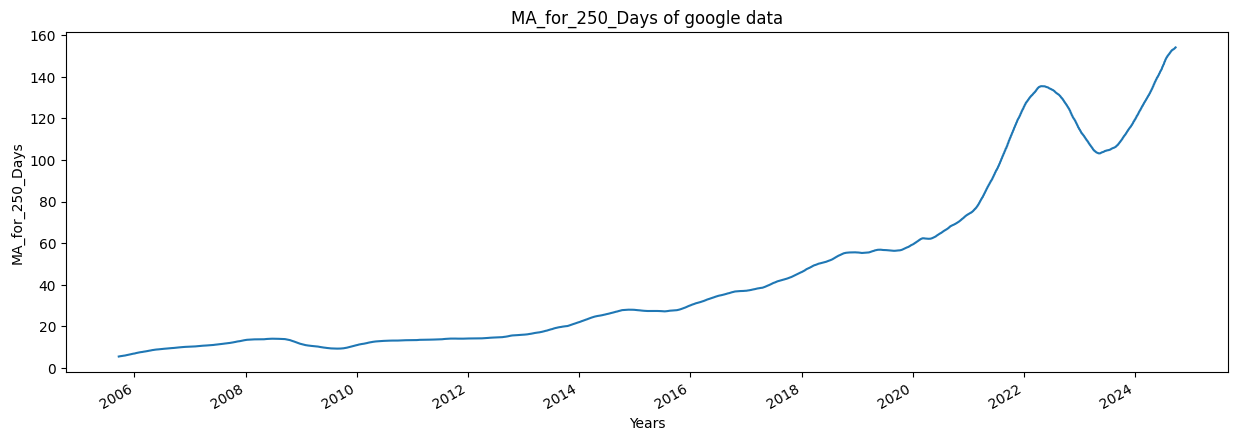

In [41]:
plot_graph((15,5),google_data['MA_for_250_Days'],'MA_for_250_Days')

<Figure size 640x480 with 0 Axes>

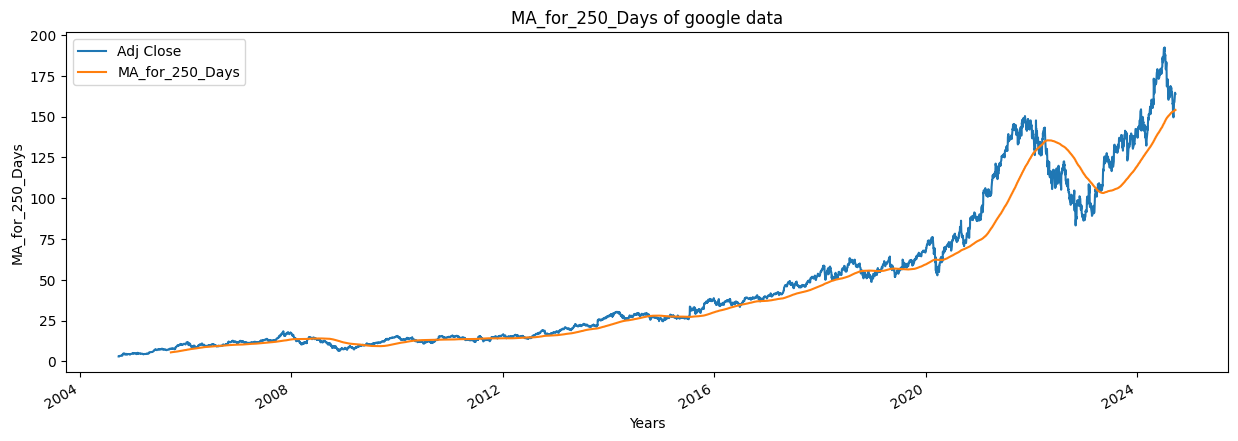

In [43]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_Days']],'MA_for_250_Days')

In [46]:
google_data["MA_for_100_Days"] = google_data['Adj Close'].rolling(100).mean()

<Figure size 640x480 with 0 Axes>

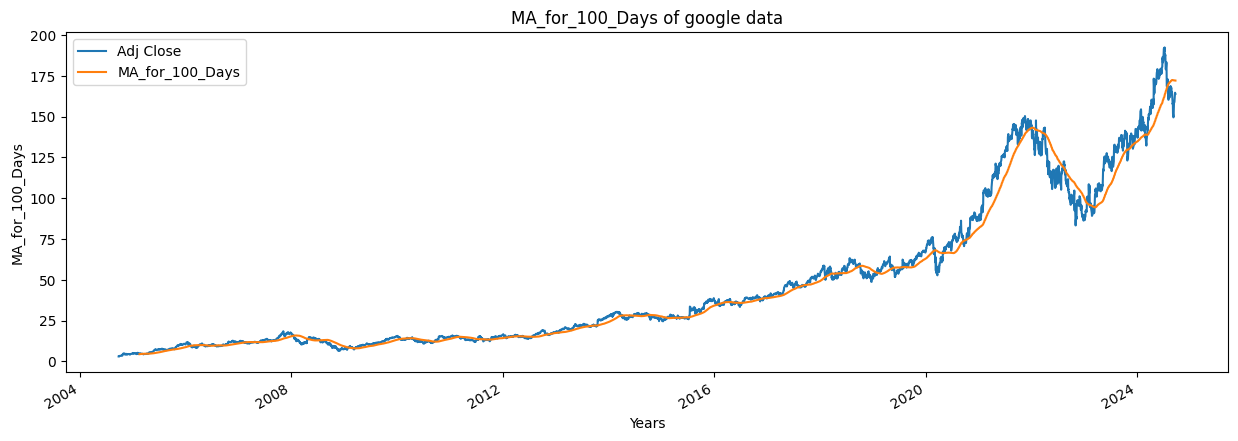

In [47]:
plot_graph((15,5) , google_data[['Adj Close','MA_for_100_Days']], "MA_for_100_Days")

<Figure size 640x480 with 0 Axes>

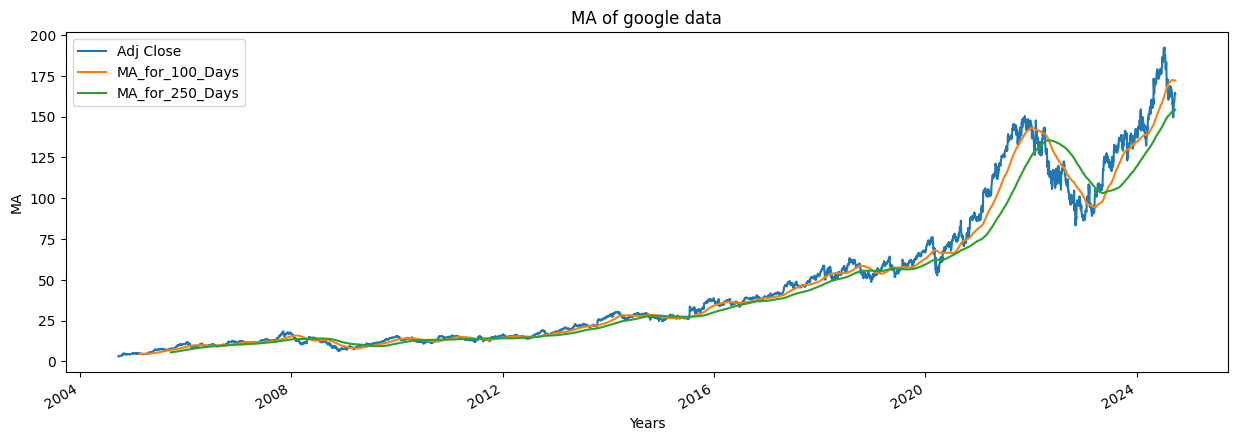

In [48]:
plot_graph((15,5) , google_data[['Adj Close','MA_for_100_Days','MA_for_250_Days']], "MA")

In [50]:
google_data['perc_change'] =  google_data['Adj Close'].pct_change()

In [51]:
google_data['perc_change'] 

Date
2004-09-24         NaN
2004-09-27   -0.013102
2004-09-28    0.072721
2004-09-29    0.033265
2004-09-30   -0.011291
                ...   
2024-09-17    0.008114
2024-09-18    0.003307
2024-09-19    0.015111
2024-09-20    0.008576
2024-09-23   -0.004252
Name: perc_change, Length: 5033, dtype: float64

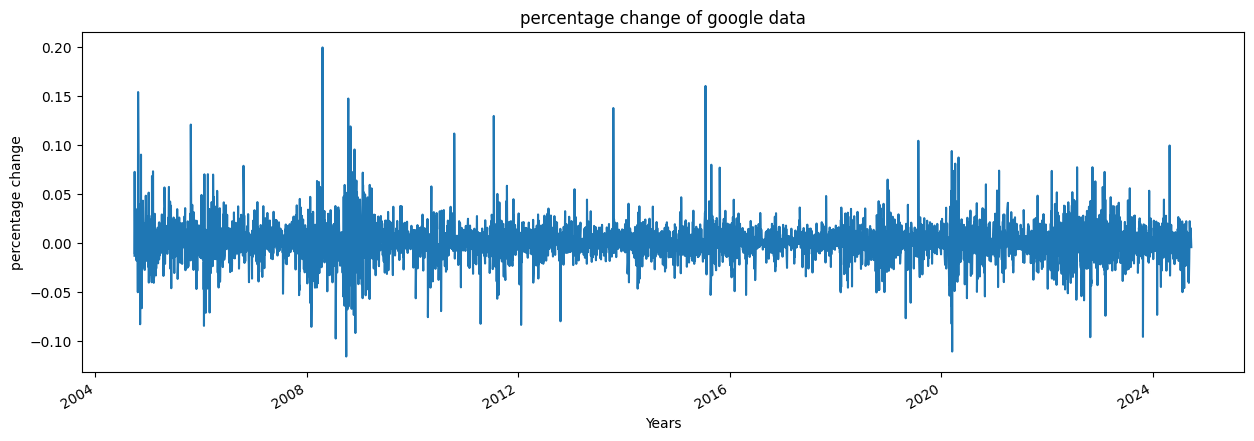

In [54]:
plot_graph((15,5),google_data['perc_change'],'percentage change')

In [63]:
Adj_close_price = google_data[['Adj Close']]

In [64]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([2.93824434]))

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[2.05876920e-04],
       [0.00000000e+00],
       [1.12774517e-03],
       ...,
       [8.46060317e-01],
       [8.53449377e-01],
       [8.49754847e-01]])

In [68]:
len(scaled_data)

5033

In [71]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)) :
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data,y_data = np.array(x_data),np.array(y_data)

In [72]:
x_data[0],y_data[0]

(array([[0.00020588],
        [0.        ],
        [0.00112775],
        [0.00168113],
        [0.00148705],
        [0.00187783],
        [0.00220304],
        [0.00263709],
        [0.00246793],
        [0.00270003],
        [0.00255316],
        [0.00222926],
        [0.00250989],
        [0.00296885],
        [0.0031131 ],
        [0.00338979],
        [0.00405202],
        [0.00389203],
        [0.00291509],
        [0.00408086],
        [0.00710349],
        [0.00906655],
        [0.00833221],
        [0.00887903],
        [0.00984024],
        [0.00949143],
        [0.01019823],
        [0.01004612],
        [0.00962649],
        [0.00871249],
        [0.0066996 ],
        [0.00711922],
        [0.00661436],
        [0.00650421],
        [0.00849219],
        [0.00835843],
        [0.00873478],
        [0.00711791],
        [0.00711267],
        [0.00646225],
        [0.00670615],
        [0.00614228],
        [0.00645962],
        [0.00740903],
        [0.00801618],
        [0

In [74]:
int(len(x_data)*0.7)

3453

In [77]:
splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [80]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [84]:
model = Sequential()
model.add(LSTM(128,return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences =False))
model.add(Dense(25))
model.add(Dense(1))

In [86]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [87]:
model.fit(x_train,y_train,batch_size = 32 ,epochs =50)

Epoch 1/50
108/108 [==============================] - 8s 66ms/step - loss: 3.2169e-04
Epoch 2/50
108/108 [==============================] - 7s 68ms/step - loss: 2.3315e-05
Epoch 3/50
108/108 [==============================] - 8s 71ms/step - loss: 2.4352e-05
Epoch 4/50
108/108 [==============================] - 8s 69ms/step - loss: 2.5555e-05
Epoch 5/50
108/108 [==============================] - 8s 70ms/step - loss: 2.4188e-05
Epoch 6/50
108/108 [==============================] - 7s 69ms/step - loss: 2.5663e-05
Epoch 7/50
108/108 [==============================] - 8s 70ms/step - loss: 2.0604e-05
Epoch 8/50
108/108 [==============================] - 8s 71ms/step - loss: 2.0357e-05
Epoch 9/50
108/108 [==============================] - 8s 70ms/step - loss: 2.1808e-05
Epoch 10/50
108/108 [==============================] - 8s 70ms/step - loss: 2.0333e-05
Epoch 11/50
108/108 [==============================] - 8s 71ms/step - loss: 2.2492e-05
Epoch 12/50
108/108 [==============================]

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
predictions =  model.predict(x_test)

47/47 [==============================] - 1s 22ms/step


In [90]:
predictions

array([[0.27314052],
       [0.27009434],
       [0.26451284],
       ...,
       [0.84270847],
       [0.85335076],
       [0.86218584]], dtype=float32)

In [93]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54.689762],
       [ 54.112606],
       [ 53.055088],
       ...,
       [162.60493 ],
       [164.6213  ],
       [166.29529 ]], dtype=float32)

In [94]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 52.75992966],
       [ 51.8771019 ],
       [ 52.66117477],
       ...,
       [163.24000549],
       [164.63999939],
       [163.94000244]])

In [99]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(inv_y_test,inv_predictions)

rmse = np.sqrt(mse)
rmse

2.584240964653231

In [102]:
ploting_data = pd.DataFrame(
    {
        'original_test_data' : inv_y_test.reshape(-1),
        'Predicted_data': inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len +100:]
)

ploting_data.head()



,original_test_data,Predicted_data
Date,,
2018-11-02,52.759930,54.689762
2018-11-05,51.877102,54.112606
2018-11-06,52.661175,53.055088
2018-11-07,54.535572,53.319321
2018-11-08,53.987415,55.042961


<Figure size 640x480 with 0 Axes>

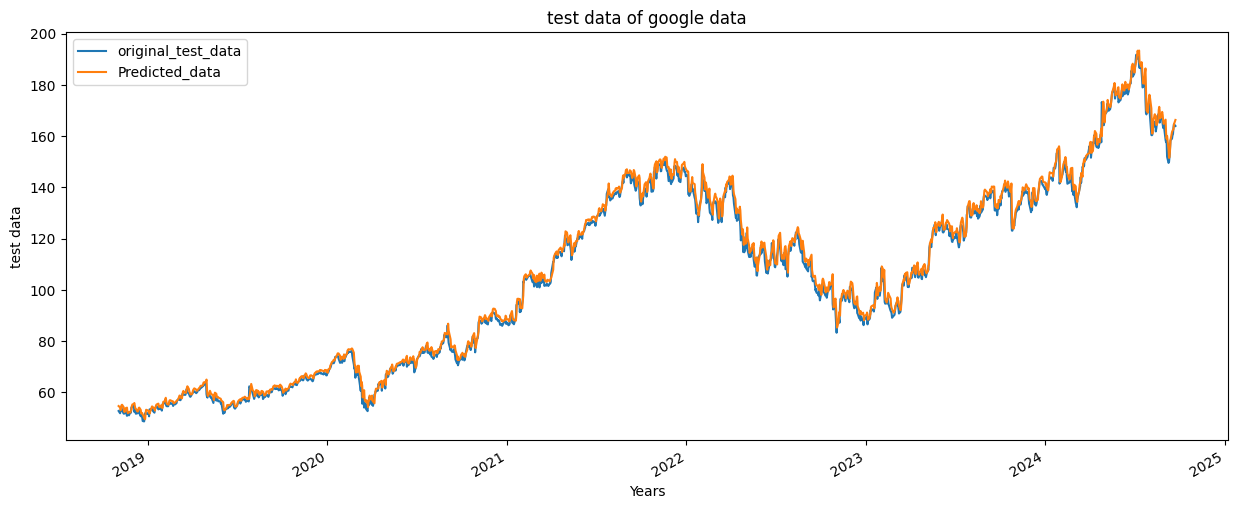

In [105]:
plot_graph((15,6),ploting_data[['original_test_data','Predicted_data']],"test data")

<Figure size 640x480 with 0 Axes>

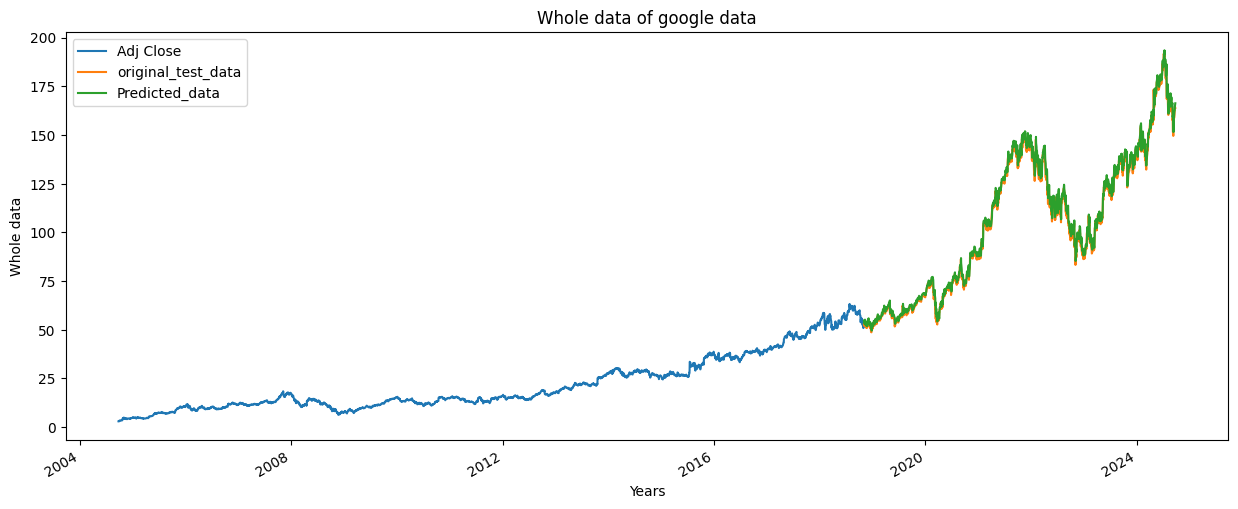

In [107]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis = 0),"Whole data")

In [108]:
model.save("Stock_price_model.keras")

In [110]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


In [111]:
import keras

In [113]:

print(f"Keras version: {keras.__version__}")

Keras version: 2.15.0


In [114]:
pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/chamarabandara/miniforge3/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [115]:
pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /Users/chamarabandara/miniforge3/lib/python3.10/site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow, tensorflow-macos
Note: you may need to restart the kernel to use updated packages.
